In [1]:
import numpy as np
import networkx as nx
import pandas as pd
import scipy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import os
from pathlib import Path
from hcga.io import save_dataset
from hcga.graph import Graph, GraphCollection
from math import log
import joblib
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score


if not Path("datasets").exists():
    os.mkdir("datasets")
if not Path("results").exists():
    os.mkdir("results")

# Different parameters for random graphs

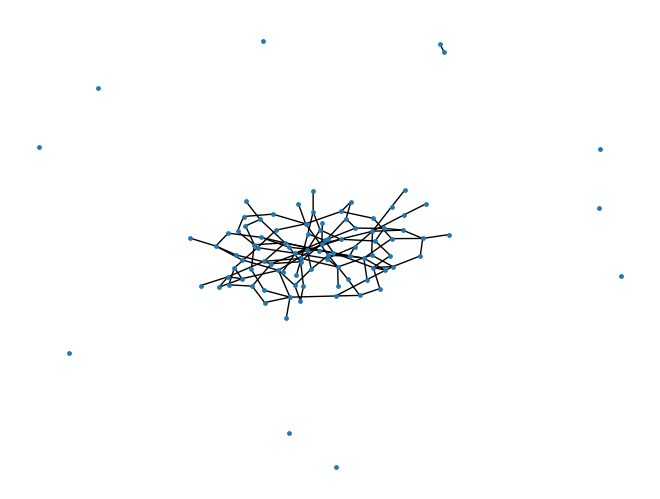

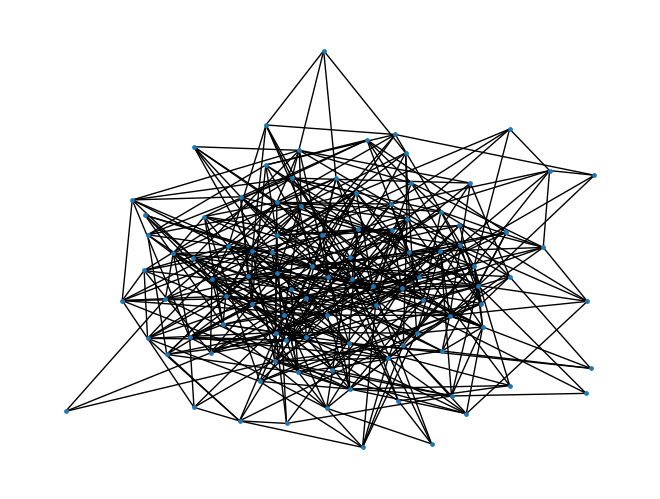

In [2]:
%matplotlib inline
N=100

# For p lower than log(N)/N
pl = log(N)/(2*N)
G_GNP = nx.gnp_random_graph(N,pl)
plt.figure(1)
nx.draw(G_GNP,node_size=6)

# For p greater than log(N)/N
pg = 2 * log(N)/N
G_GNP = nx.gnp_random_graph(N,pg)
plt.figure(2)
nx.draw(G_GNP,node_size=6)

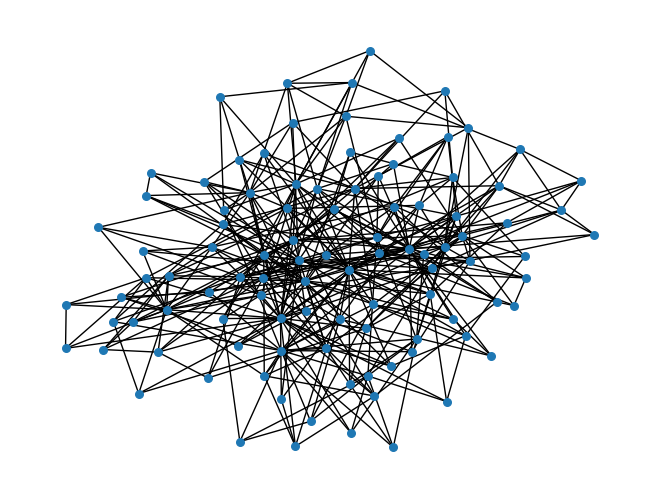

In [23]:
%matplotlib inline
G_PL = nx.powerlaw_cluster_graph(100, 4, 0.6)
plt.figure(1)
nx.draw(G_PL, node_size=30)

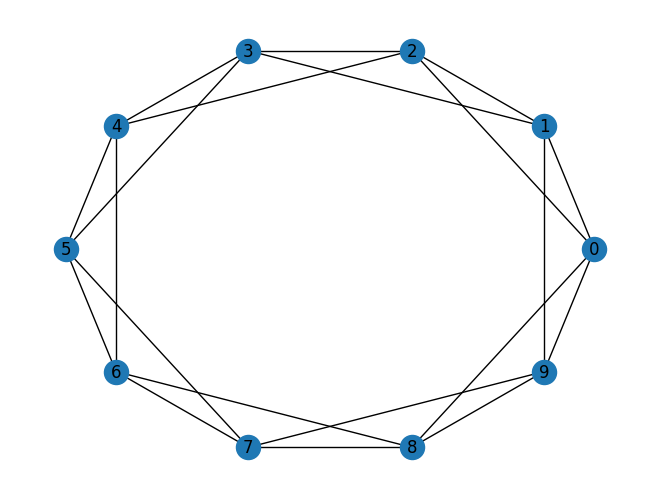

In [3]:
%matplotlib inline
G_WS1 = nx.watts_strogatz_graph(10, 4, 0)
plt.figure(1)
nx.draw_circular(G_WS1, with_labels=True)

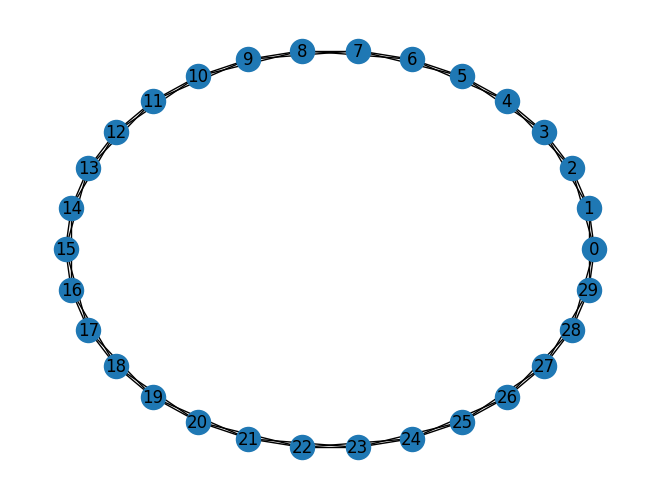

In [4]:
G_WS2 = nx.watts_strogatz_graph(30, 4, 0)
plt.figure(2)
nx.draw_circular(G_WS2, with_labels=True)

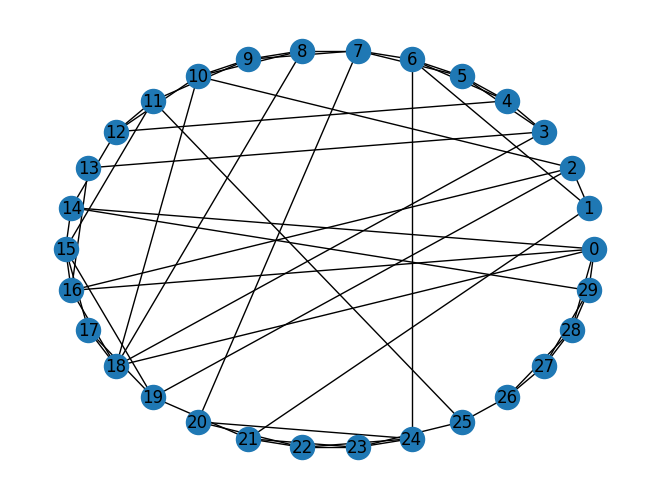

In [5]:
G_WS3 = nx.watts_strogatz_graph(30, 4, 0.3)
plt.figure(3)
nx.draw_circular(G_WS3, with_labels=True)

# Generate labelled random graphs

In [2]:
# defining number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3

# empty list of graphs and labels
graphs = []
labels = []
node_features = []

# setting probability of edge existing for random graphs
p = 0.6

# setting number of edges to add per node
m = 4

In [3]:
# adding 50 random graphs (label 0)
for i in range(num_g):
    
    g = nx.fast_gnp_random_graph(n, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(0)

In [4]:
# adding 50 powerlaw cluster graphs (label 1)
for i in range(num_g):
    
    g = nx.powerlaw_cluster_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(1)

In [5]:
# adding 50 watts strogatz graphs (label 2)
for i in range(num_g):
    
    g = nx.watts_strogatz_graph(n, m, p)
    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

    labels.append(2)

In [6]:
# create graph collection object
g_c = GraphCollection()

# add graphs, node features and labels to the object
g_c.add_graph_list(graphs, node_features, labels)

In [7]:
# perform some sanity checks

print("There are {} graphs".format(len(g_c.graphs)))
print("There are {} features per node".format(g_c.get_n_node_features()))

There are 150 graphs
There are 3 features per node


In [8]:
# we can save this if we want to and run everything from the command line

save_dataset(
    g_c,
    "labelled_graph_dataset",
    folder="./datasets/labelled_graph",
)

## Extracting features and generate feature matrix

In [9]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [10]:
# load previously saved dataset
h.load_data(
    "./datasets/labelled_graph/labelled_graph_dataset.pkl"
)

In [11]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/labelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.43it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [13:21<00:00,  5.34s/it]
INFO:hcga.extraction:1264 feature extracted.


## Classification and analysis

In [12]:
# load the saved features

h.load_features("./results/labelled_graph/features.pkl")

In [13]:
# implement a classification analyse of the features

model = KNeighborsClassifier()
h.analyse_features(
    compute_shap=False,
    model = model,    
    feature_file="./results/labelled_graph/features.pkl",
    results_folder="./results/labelled_graph",
    save_model = True, # save the trained model
    plot=False,
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:955 valid features
INFO:hcga.analysis:955 with interpretability 1
INFO:hcga.analysis:Counts of graphs/label: 
label
0.0    50
1.0    50
2.0    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 1.0 +/- 0.0
INFO:hcga.analysis:Fitting model to all data


In [14]:
accuracy_matrix, top_features = h.pairwise_classification(
    feature_file="./results/labelled_graph/features.pkl"
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:955 valid features
INFO:hcga.analysis:955 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
  0%|          | 0/3 [00:00<?, ?it/s]INFO:hcga.analysis:Pairwise classification between classes 0.0 and 1.0
INFO:hcga.analysis:Counts of graphs/label: 
label
0    50
1    50
Name: count, dtype: int64
INFO:hcga.analysis:Using 10 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.9 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Accuracy: 0.99 +/- 0.03
 3

In [15]:
# find top features pairwisely
print(top_features[(0.0, 1.0)])
print(top_features[(0.0, 2.0)])
print(top_features[(1.0, 2.0)])

['CM_communities_weighted_performance_N', 'CM_communities_weighted_performance_E', 'CB_degree centrality_mean', 'CM_num_communities_weighted_N', 'Cns_connectance']
['CM_communities_weighted_performance_N', 'CM_communities_weighted_performance_E', 'CB_degree centrality_mean', 'CM_num_communities_weighted_N', 'Cns_connectance']
['CM_communities_weighted_performance_N', 'CM_communities_weighted_performance_E', 'CB_degree centrality_mean', 'CM_num_communities_weighted_N', 'Cns_connectance']


## Line Plot of Top Features

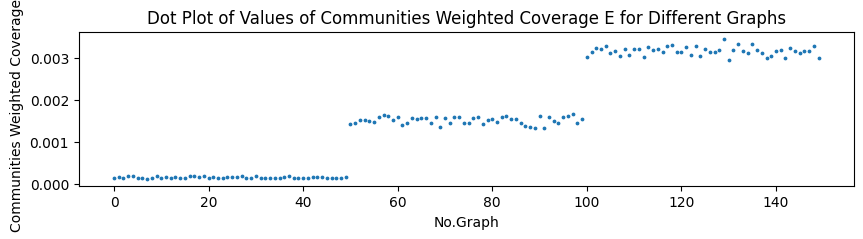

In [16]:
# Vectors of top features
CWCE = h.features[('CM', 'communities_weighted_coverage_E')]
CT = h.features[('Cns', 'connectance')]

# Create an index list
graph_no = list(range(len(CWCE)))

# Create a dot plot
%matplotlib inline
plt.figure(figsize=(10, 2))
plt.scatter(graph_no, CWCE, s=3)

plt.xlabel('No.Graph')
plt.ylabel('Communities Weighted Coverage E')
plt.title('Dot Plot of Values of Communities Weighted Coverage E for Different Graphs')

plt.show()


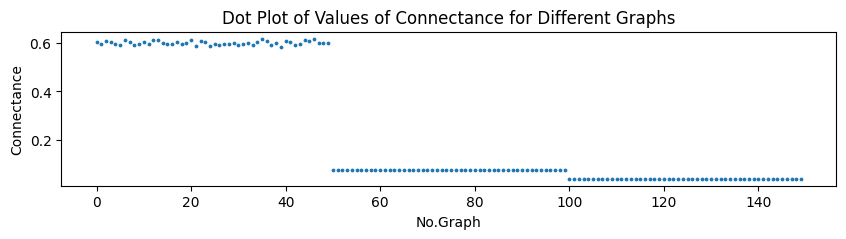

In [17]:
# Create an index list
graph_no = list(range(len(CT)))

# Create a dot plot
%matplotlib inline
plt.figure(figsize=(10, 2))
plt.scatter(graph_no, CT, s=3)

plt.xlabel('No.Graph')
plt.ylabel('Connectance')
plt.title('Dot Plot of Values of Connectance for Different Graphs')

plt.show()

## Train by top features

In [18]:
# select top features instead of feature matrix
feature1 = h.features[('CM', 'communities_weighted_coverage_N')]
feature2 = h.features[('CM', 'communities_weighted_coverage_E')]
feature3 = h.features[('CM', 'communities_weighted_performance_N')]
feature4 = h.features[('CM', 'communities_performance_N')]
feature5 = h.features[('Cns', 'connectance')]

top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [19]:
# Create the kNN classifier
knn = KNeighborsClassifier()

# Define the range of k values to test
param_grid = {'n_neighbors': np.arange(1, 31)}

# Use GridSearchCV to find the best k
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='accuracy')
grid_search.fit(top_features, labels)

# Get the best k value
best_k = grid_search.best_params_['n_neighbors']

# Train the kNN classifier with the best k
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(top_features, labels)

# save the trained file
joblib.dump(knn, 'knn_top_feature.pkl')

['knn_top_feature.pkl']

# Classifying unlabelled random graphs
Here we need to restart the kernel each time when randomly generating graphs to ensure the extract feature step run successfully.

## Generate unlabelled random graphs with same parameters

In [2]:
# defining limits on number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting limits on probability of edge existing for random graphs
p = 0.6

# adding 50 Gnp graphs
for i in range(num_g):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 50 powerlaw cluster graphs
for i in range(num_g):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)


# adding 50 watts strogatz graphs
for i in range(num_g):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_unlabelled = GraphCollection()
graphs_unlabelled.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    graphs_unlabelled, "unlabelled_graph_dataset", folder="./datasets/unlabelled_graph"
)

# perform some sanity checks
print(
    "There are {} graphs in the unlabelled dataset".format(
        len(graphs_unlabelled.graphs)
    )
)
print("There are {} features per node".format(graphs_unlabelled.get_n_node_features()))

There are 150 graphs in the unlabelled dataset
There are 3 features per node


### Extracting features and generate feature matrix

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/unlabelled_graph/unlabelled_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/unlabelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.78it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [12:59<00:00,  5.19s/it]
INFO:hcga.extraction:1264 feature extracted.


## kNN trained model

### With graph generated above

In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_test",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


In [8]:
from sklearn.metrics import f1_score
# visualise prediction
predictions = pd.read_csv("./results/kNN_test/prediction_results.csv", index_col=0)

# define the construction
construction = [0]*50 + [1]*50 + [2]*50

# print f1_score of the graph
print(f1_score(construction, predictions, average=None))

[1. 1. 1.]


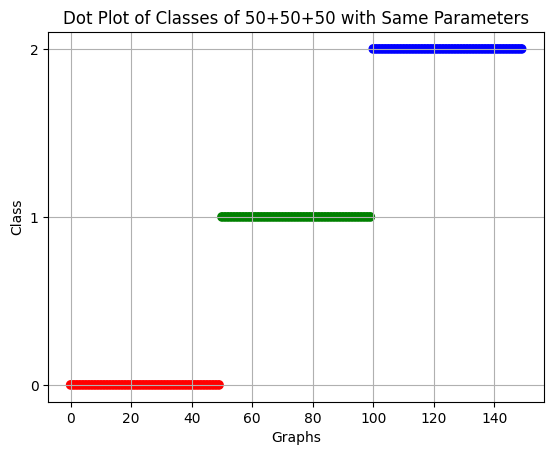

In [9]:
# list of 150 graphs
graphs = list(range(len(predictions)))

# set the colors of different actual groups
colors = ['red']*50 + ['green']*50 + ['blue']*50

# Create a dot plot
%matplotlib inline
plt.scatter(graphs, predictions, c=colors)
plt.xlabel('Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of 50+50+50 with Same Parameters')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

In [10]:
# check by top features of unlabelled graphs with same parameters

feature1 = h.features[('CM', 'communities_weighted_coverage_N')]
feature2 = h.features[('CM', 'communities_weighted_coverage_E')]
feature3 = h.features[('CM', 'communities_weighted_performance_N')]
feature4 = h.features[('CM', 'communities_performance_N')]
feature5 = h.features[('Cns', 'connectance')]

sp_top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [11]:
# load the trained data with top features
knn_trained_model = joblib.load('knn_top_feature.pkl')

In [12]:
# predict the classification result by top features
sp_pred = knn_trained_model.predict(sp_top_features)

In [13]:
# define the construction
construction = [0]*50 + [1]*50 + [2]*50

# print f1_score of the graph
print(f1_score(construction, sp_pred, average=None))

[1. 1. 1.]


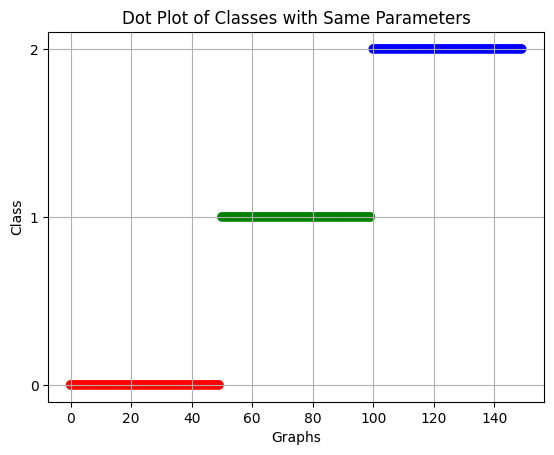

In [14]:
# list of 150 graphs
graphs = list(range(len(sp_pred)))

# set the colors of different actual groups
colors = ['red']*50 + ['green']*50 + ['blue']*50

# Create a dot plot
%matplotlib inline
plt.scatter(graphs, sp_pred, c=colors)
plt.xlabel('Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes with Same Parameters')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Changing the proportion of different types of graphs

In [2]:
# defining number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting the probability
p = 0.6

# adding 40 Gnp graphs
for i in range(40):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 45 powerlaw cluster graphs
for i in range(45):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# adding 65 watts strogatz graphs
for i in range(65):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset1", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset1.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features1.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:05<00:00,  8.43it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [11:29<00:00,  4.60s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test1",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


In [8]:
from sklearn.metrics import f1_score
# read the prediction
changed_predictions = pd.read_csv("./results/kNN_changed_test1/prediction_results.csv", index_col=0)

# define the construction
construction = [0]*40 + [1]*45 + [2]*65

# print f1_score of the graph
print(f1_score(construction, changed_predictions, average=None))

[1. 1. 1.]


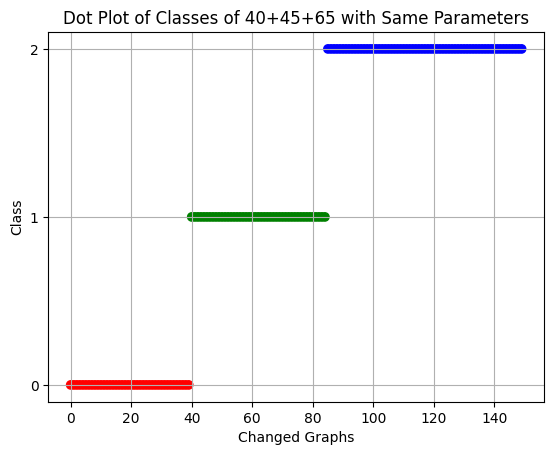

In [9]:
# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# set the colors of different actual groups
colors = ['red']*40 + ['green']*45 + ['blue']*65

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of 40+45+65 with Same Parameters')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Two types of Graphs instead of three

In [2]:
# defining number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting the probability
p = 0.6

# adding 50 Gnp graphs
for i in range(50):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 100 powerlaw cluster graphs
for i in range(100):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features0.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  8.89it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [13:02<00:00,  5.22s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test",
)

INFO:hcga.analysis:1264 total features


INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


In [8]:
from sklearn.metrics import f1_score
# read the prediction
changed_predictions = pd.read_csv("./results/kNN_changed_test/prediction_results.csv", index_col=0)

# define the construction
construction = [0]*50 + [1]*100

# print f1_score of the graph
print(f1_score(construction, changed_predictions, average=None))

[1.         0.78787879 0.        ]


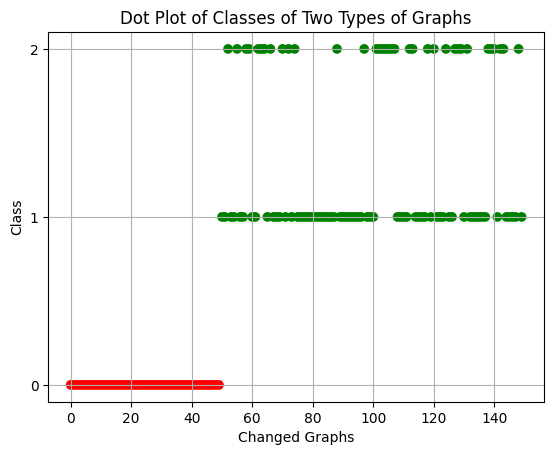

In [9]:
# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# set the colors of different actual groups
colors = ['red']*50 + ['green']*100

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of Two Types of Graphs')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

In [10]:
# select top features instead of feature matrix
feature1 = h.features[('CM', 'communities_weighted_coverage_N')]
feature2 = h.features[('CM', 'communities_weighted_coverage_E')]
feature3 = h.features[('CM', 'communities_weighted_performance_N')]
feature4 = h.features[('CM', 'communities_performance_N')]
feature5 = h.features[('Cns', 'connectance')]

pl_top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [11]:
# load the trained data
knn_trained_model = joblib.load('knn_top_feature.pkl')

In [12]:
# predict the classification result with 50 gnp and 100 power law

pl_pred = knn_trained_model.predict(pl_top_features)

In [13]:
from sklearn.metrics import f1_score

# define the construction
construction = [0]*50 + [1]*100

# print f1_score of the graph
print(f1_score(construction, pl_pred, average=None))

[1. 1.]


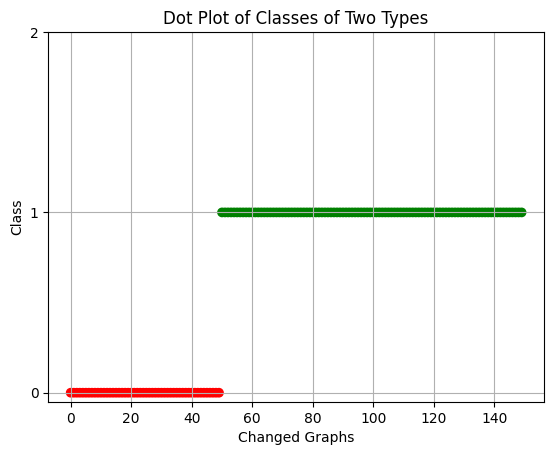

In [14]:
# list of 150 graphs
graphs = list(range(len(pl_pred)))

# set the colors of different actual groups
colors = ['red']*50 + ['green']*100

# Create a dot plot
%matplotlib inline
plt.scatter(graphs, pl_pred, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of Two Types')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### 5 G_Np + 140 power law + 5 Watts-Strogatz

In [2]:
# defining number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting the probability
p = 0.6

# adding 5 Gnp graphs
for i in range(5):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 140 powerlaw cluster graphs
for i in range(140):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

# adding 5 watts strogatz graphs
for i in range(5):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_unlabelled = GraphCollection()
graphs_unlabelled.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    graphs_unlabelled, "more_graph_dataset", folder="./datasets/more_graph"
)

# perform some sanity checks
print(
    "There are {} graphs in the unlabelled dataset".format(
        len(graphs_unlabelled.graphs)
    )
)
print("There are {} features per node".format(graphs_unlabelled.get_n_node_features()))

There are 150 graphs in the unlabelled dataset
There are 3 features per node


In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/more_graph/more_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/more_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00, 10.08it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [10:04<00:00,  4.03s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/more_test",
)

INFO:hcga.analysis:1264 total features


INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


In [8]:
from sklearn.metrics import f1_score
# read the prediction
changed_predictions = pd.read_csv("./results/more_test/prediction_results.csv", index_col=0)

# define the construction
construction = [0]*5 + [1]*140 + [2]*5

# print f1_score of the graph
print(f1_score(construction, changed_predictions, average=None))

[1. 1. 1.]


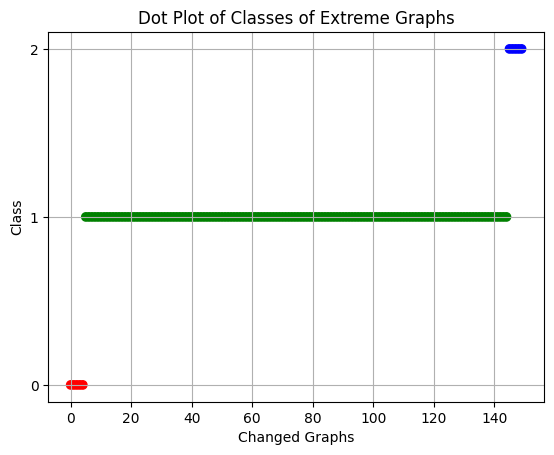

In [9]:
# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# set the colors of different actual groups
colors = ['red']*5 + ['green']*140 + ['blue']*5

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of Extreme Graphs')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### 50 G_Np + 100 Watts-Strogatz

In [2]:
# defining number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting the probability
p = 0.6

# adding 50 Gnp graphs
for i in range(50):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

# setting limits on number of edges to add per node
m = 4

# adding 100 watts strogatz graphs
for i in range(100):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_unlabelled = GraphCollection()
graphs_unlabelled.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    graphs_unlabelled, "more_graph_dataset1", folder="./datasets/more_graph"
)

# perform some sanity checks
print(
    "There are {} graphs in the unlabelled dataset".format(
        len(graphs_unlabelled.graphs)
    )
)
print("There are {} features per node".format(graphs_unlabelled.get_n_node_features()))

There are 150 graphs in the unlabelled dataset
There are 3 features per node


In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/more_graph/more_graph_dataset1.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/more_graph/features1.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.84it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [12:46<00:00,  5.11s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/more_test1",
)

INFO:hcga.analysis:1264 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


In [8]:
from sklearn.metrics import f1_score
# read the prediction
changed_predictions = pd.read_csv("./results/more_test1/prediction_results.csv", index_col=0)

# define the construction
construction = [0]*50 + [2]*100

# print f1_score of the graph
print(f1_score(construction, changed_predictions, average=None))

[1.         0.         0.96907216]


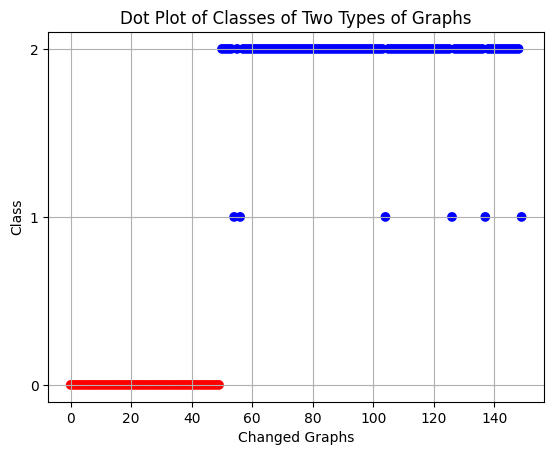

In [9]:
# visualise prediction

# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# set the colors of different actual groups
colors = ['red']*50 + ['blue']*100

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of Two Types of Graphs')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

In [10]:
# select top features instead of feature matrix
feature1 = h.features[('CM', 'communities_weighted_coverage_N')]
feature2 = h.features[('CM', 'communities_weighted_coverage_E')]
feature3 = h.features[('CM', 'communities_weighted_performance_N')]
feature4 = h.features[('CM', 'communities_performance_N')]
feature5 = h.features[('Cns', 'connectance')]

sw_top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [11]:
# load the trained data
knn_trained_model = joblib.load('knn_top_feature.pkl')

In [12]:
# predict the classification result with 50 gnp and 100 Watts Strogatz

sw_pred = knn_trained_model.predict(sw_top_features)

In [13]:
from sklearn.metrics import f1_score

# define the construction
construction = [0]*50 + [2]*100

# print f1_score of the graph
print(f1_score(construction, sw_pred, average=None))

[1. 1.]


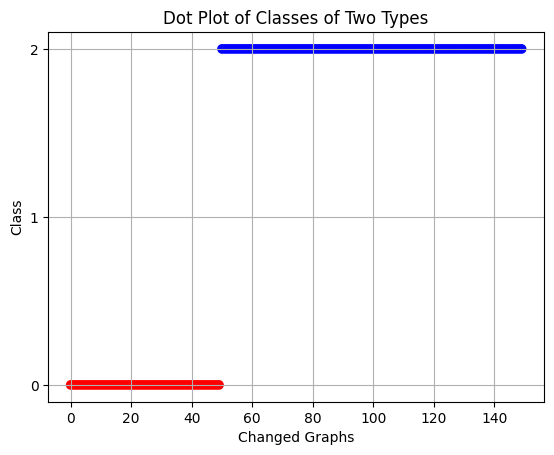

In [14]:
# list of 150 graphs
graphs = list(range(len(sw_pred)))

# set the colors of different actual groups
colors = ['red']*50 + ['blue']*100

# Create a dot plot
%matplotlib inline
plt.scatter(graphs, sw_pred, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classes of Two Types')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Changing the parameters within a certain range

In [2]:
# defining limits on number of nodes
n = 100

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# changing probability from 0.6 to 0.4
p = 0.4

# adding 50 Gnp graphs
for i in range(30):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 4

# adding 50 powerlaw cluster graphs
for i in range(50):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)


# adding 50 watts strogatz graphs
for i in range(70):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset2", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset2.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features2.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.38it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [09:26<00:00,  3.78s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test2",
)

INFO:hcga.analysis:1264 total features


INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


In [8]:
from sklearn.metrics import f1_score
# read the prediction
changed_predictions = pd.read_csv("./results/kNN_changed_test2/prediction_results.csv", index_col=0)

# define the construction
construction = [0]*30 + [1]*50 + [2]*70

# print f1_score of the graph
print(f1_score(construction, changed_predictions, average=None))

[1. 1. 1.]


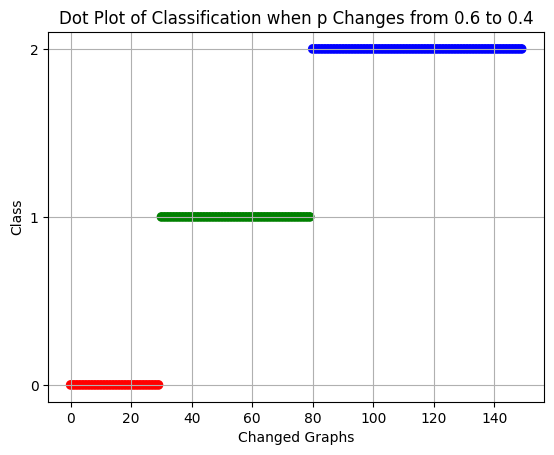

In [9]:
# list of 150 graphs
changed_graphs = list(range(len(changed_predictions)))

# set the colors of different actual groups
colors = ['red']*30 + ['green']*50 + ['blue']*70

# Create a dot plot
%matplotlib inline
plt.scatter(changed_graphs, changed_predictions, c=colors)
plt.xlabel('Changed Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Classification when p Changes from 0.6 to 0.4')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

### Changing the parameters greatly

In [2]:
# defining limits on number of nodes
n = 100

# number of graphs
num_g = 50

# number of node features
n_nf = 3


# empty list of graphs and labels
graphs = []
node_features = []


# setting limits on probability of edge existing for random graphs
p = 0.03

# adding 50 Gnp graphs
for i in range(num_g):

    g = nx.fast_gnp_random_graph(n, p)
    g.label = 0

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)

    node_features.append(node_feat_matrix)


# setting limits on number of edges to add per node
m = 10

# adding 50 powerlaw cluster graphs
for i in range(num_g):

    g = nx.powerlaw_cluster_graph(n, m, p)
    g.label = 1

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)


# adding 50 watts strogatz graphs
for i in range(num_g):

    g = nx.watts_strogatz_graph(n, m, p)
    g.label = 2

    node_feat_matrix = np.random.random((n, n_nf))

    graphs.append(g)
    node_features.append(node_feat_matrix)

In [3]:
# create graph collection object
graphs_changed = GraphCollection()
graphs_changed.add_graph_list(graphs, node_features)  # loaded without the labels

# save the changed dataset
save_dataset(
    graphs_changed, "changed_graph_dataset3", folder="./datasets/changed_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/changed_graph/changed_graph_dataset3.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/changed_graph/features3.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.90it/s]
INFO:hcga.extraction:Extracting features from 150 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 150 graphs:
100%|██████████| 150/150 [08:01<00:00,  3.21s/it]
INFO:hcga.extraction:1264 feature extracted.


In [7]:
h.analyse_features(
    plot=False,
    trained_model="./results/labelled_graph/fitted_model",
    results_folder="./results/kNN_changed_test3",
)

INFO:hcga.analysis:1264 total features


INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:954 valid features
INFO:hcga.analysis:954 with interpretability 1


ValueError: Input X contains NaN.
KNeighborsClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

## Analyse by Hierarchical Clustering
The graphs are based on what we generated in the first step of unlabelled graphs.

In [7]:
# substitute None terms in feature matrix with 0
h_dropped = h.features.fillna(0)

# do Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(h_dropped)

print(clustering.labels_)

[0 1 2 1 0 1 0 2 2 2 2 2 1 2 0 2 2 2 0 2 2 1 0 2 2 1 2 1 0 0 0 0 0 0 0 0 0
 2 2 2 2 2 2 2 2 0 2 0 1 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1]


In [8]:
from sklearn.metrics import f1_score

# define the construction
construction = [0]*50 + [1]*50 + [2]*50

# print f1_score of the graph
print(f1_score(construction, clustering.labels_, average=None))

[0.50746269 0.63291139 0.        ]


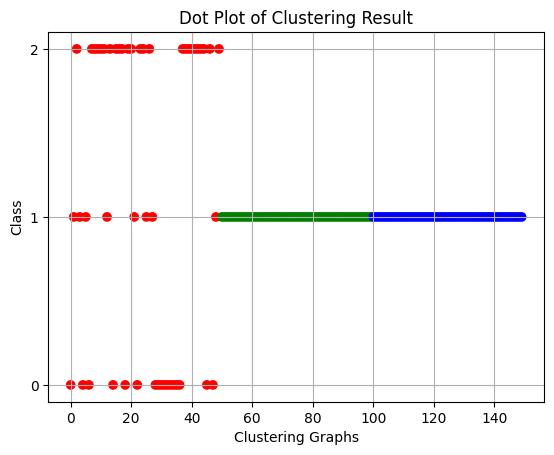

In [9]:
# list of 150 graphs
clustering_graphs = list(range(len(clustering.labels_)))

# set the colors of different actual groups
colors = ['red']*50 + ['green']*50 + ['blue']*50

# Create a dot plot
%matplotlib inline
plt.scatter(clustering_graphs, clustering.labels_, c=colors)
plt.xlabel('Clustering Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Clustering Result')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

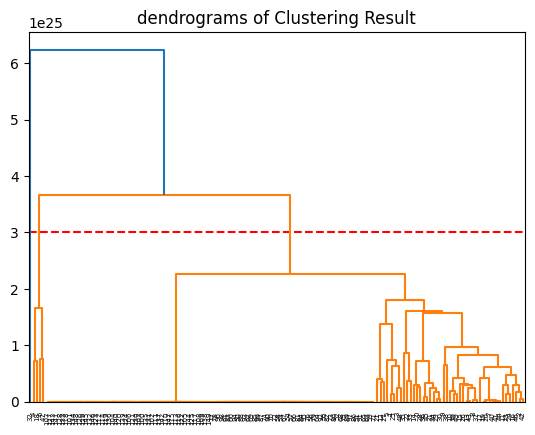

In [17]:
# visuliasation
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_data = linkage(h_dropped)

%matplotlib inline
plt.title('dendrograms of Clustering Result')
plt.axhline(y=3e25, color='r', linestyle='--')
dendrogram(linkage_data)
plt.show()

In [11]:
# select top features instead of feature matrix
feature1 = h.features[('CM', 'communities_weighted_coverage_N')]
feature2 = h.features[('CM', 'communities_weighted_coverage_E')]
feature3 = h.features[('CM', 'communities_weighted_performance_N')]
feature4 = h.features[('CM', 'communities_performance_N')]
feature5 = h.features[('Cns', 'connectance')]

top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [12]:
# substitute None terms in feature matrix with 0
top_dropped = top_features.fillna(0)

# do Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
clustering = AgglomerativeClustering(n_clusters=3).fit(top_dropped)

print(clustering.labels_)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [13]:
from sklearn.metrics import f1_score

# define the construction
construction = [0]*50 + [1]*50 + [2]*50

# print f1_score of the graph
print(f1_score(construction, clustering.labels_, average=None))

[1. 1. 1.]


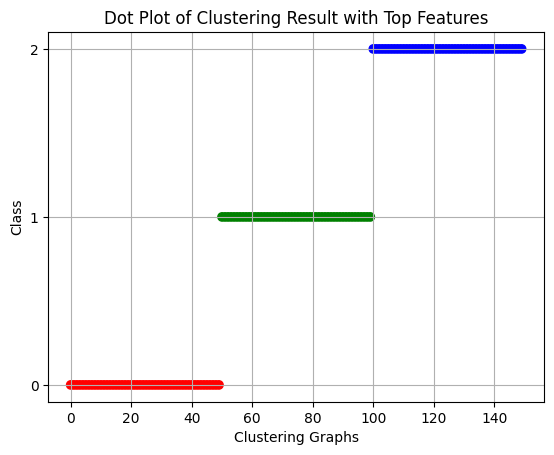

In [14]:
# list of 150 graphs
clustering_graphs = list(range(len(clustering.labels_)))

# set the colors of different actual groups
colors = ['red']*50 + ['green']*50 + ['blue']*50

# Create a dot plot
%matplotlib inline
plt.scatter(clustering_graphs, clustering.labels_, c=colors)
plt.xlabel('Clustering Graphs')
plt.ylabel('Class')
plt.title('Dot Plot of Clustering Result with Top Features')
plt.yticks([0, 1, 2])
plt.grid(True)
plt.show()

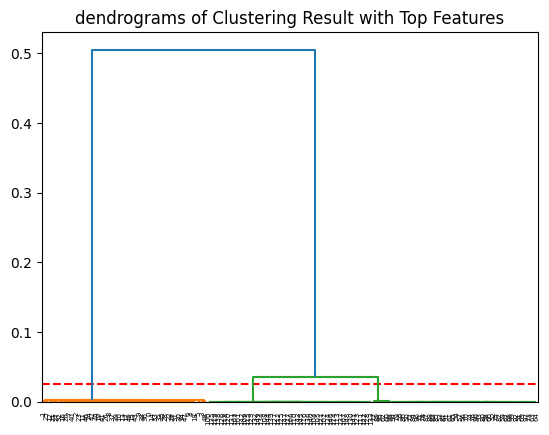

In [15]:
# visuliasation
from scipy.cluster.hierarchy import linkage, dendrogram
linkage_top = linkage(top_dropped)

%matplotlib inline
plt.title('dendrograms of Clustering Result with Top Features')
plt.axhline(y=0.025, color='r', linestyle='--')
dendrogram(linkage_top)
plt.show()

## Analyse by UMAP

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: >

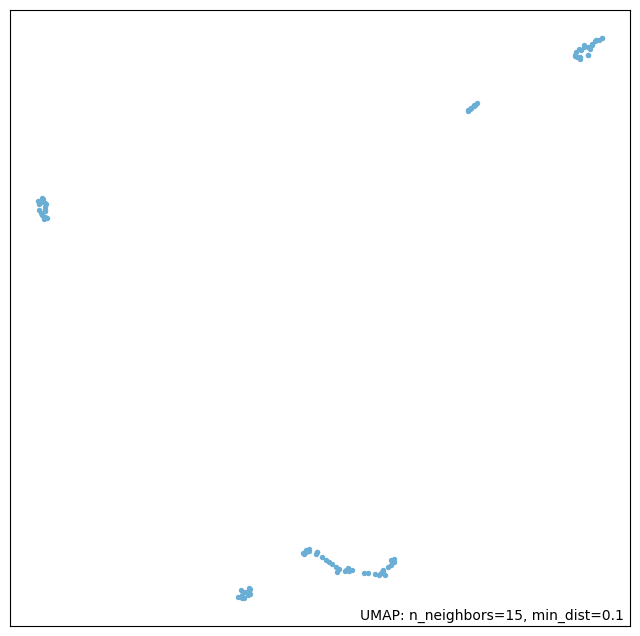

In [16]:
from umap import UMAP, plot
map = UMAP().fit(h_dropped)

%matplotlib inline
plot.points(map)

## Real-world visulisation

### Top features

In [2]:
# Read the graphs
g118 = nx.read_edgelist('./ENZYMES_g118/ENZYMES_g118.edges')
g123 = nx.read_edgelist('./ENZYMES_g123/ENZYMES_g123.edges')
g293 = nx.read_edgelist('./ENZYMES_g293/ENZYMES_g293.edges')
g295 = nx.read_edgelist('./ENZYMES_g295/ENZYMES_g295.edges')
g296 = nx.read_edgelist('./ENZYMES_g296/ENZYMES_g296.edges')
g297 = nx.read_edgelist('./ENZYMES_g297/ENZYMES_g297.edges')
g2010 = nx.read_edgelist('./reptilia-tortoise-network-cs-2010/reptilia-tortoise-network-cs-2010.edges')
g2011 = nx.read_edgelist('./reptilia-tortoise-network-cs-2011/reptilia-tortoise-network-cs-2011.edges')
g2012 = nx.read_edgelist('./reptilia-tortoise-network-cs-2012/reptilia-tortoise-network-cs-2012.edges')
g2013 = nx.read_edgelist('./reptilia-tortoise-network-cs-2013/reptilia-tortoise-network-cs-2013.edges')
g2014 = nx.read_edgelist('./reptilia-tortoise-network-cs-2014/reptilia-tortoise-network-cs-2014.edges')
g2015 = nx.read_edgelist('./reptilia-tortoise-network-cs-2015/reptilia-tortoise-network-cs-2015.edges')

graphs = [g118, g123, g293, g295, g296, g297, g2010, g2011, g2012, g2013, g2014, g2015]

# number of node features
n_nf = 3
node_features = []

for g in graphs:
    node_feat_matrix = np.random.random((g.number_of_nodes(), n_nf))

In [3]:
labels = [0]*6 + [1]*6

In [4]:
# create graph collection object
g_c = GraphCollection()

# add graphs, node features and labels to the object
g_c.add_graph_list(graphs, node_features, labels)

In [5]:
# we can save this if we want to and run everything from the command line

save_dataset(
    g_c,
    "labelled_real_graph_dataset",
    folder="./datasets/real_labelled_graph",
)

In [6]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [7]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/real_labelled_graph/labelled_real_graph_dataset.pkl"
)

In [8]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/real_labelled_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00,  9.94it/s]
INFO:hcga.extraction:Extracting features from 12 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 12 graphs:
100%|██████████| 12/12 [00:27<00:00,  2.28s/it]
INFO:hcga.extraction:1156 feature extracted.


In [9]:
# implement a classification analyse of the features

from sklearn.neighbors import KNeighborsClassifier

model = KNeighborsClassifier()
h.analyse_features(
    compute_shap=False,
    model = model,    
    feature_file="./results/real_labelled_graph/features.pkl",
    results_folder="./results/real_labelled_graph",
    save_model = True, # save the trained model
    plot=False,
)

INFO:hcga.analysis:1156 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:690 valid features
INFO:hcga.analysis:690 with interpretability 1
INFO:hcga.analysis:Counts of graphs/label: 
label
0.0    6
1.0    6
Name: count, dtype: int64
INFO:hcga.analysis:Using 3 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.75 ---
INFO:hcga.analysis:Accuracy: 0.917 +/- 0.118
INFO:hcga.analysis:Fitting model to all data


In [10]:
accuracy_matrix, top_features = h.pairwise_classification(
    feature_file="./results/real_labelled_graph/features.pkl"
)

print(top_features)

INFO:hcga.analysis:1156 total features
INFO:hcga.analysis:0 graphs were removed for more than 0.3 fraction of bad features
INFO:hcga.analysis:690 valid features
INFO:hcga.analysis:690 with interpretability 1
INFO:hcga.analysis:... Using Xgboost classifier ...
  0%|          | 0/1 [00:00<?, ?it/s]INFO:hcga.analysis:Pairwise classification between classes 0.0 and 1.0
INFO:hcga.analysis:Counts of graphs/label: 
label
0    6
1    6
Name: count, dtype: int64
INFO:hcga.analysis:Using 3 splits
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 1.0 ---
INFO:hcga.analysis:Fold accuracy: --- 0.75 ---
INFO:hcga.analysis:Accuracy: 0.917 +/- 0.118
100%|██████████| 1/1 [00:00<00:00,  1.00it/s]

{(0.0, 1.0): ['RBC_radius_N', 'RBC_radius_E', 'RBC_transitivity_N', 'RBC_number_of_edges_no_selfloops_N', 'Cns_connectance']}


### Hierarchical Clustering

In [2]:
# Read the graphs
g118 = nx.read_edgelist('./ENZYMES_g118/ENZYMES_g118.edges')
g123 = nx.read_edgelist('./ENZYMES_g123/ENZYMES_g123.edges')
g293 = nx.read_edgelist('./ENZYMES_g293/ENZYMES_g293.edges')
g295 = nx.read_edgelist('./ENZYMES_g295/ENZYMES_g295.edges')
g296 = nx.read_edgelist('./ENZYMES_g296/ENZYMES_g296.edges')
g297 = nx.read_edgelist('./ENZYMES_g297/ENZYMES_g297.edges')
g2010 = nx.read_edgelist('./reptilia-tortoise-network-cs-2010/reptilia-tortoise-network-cs-2010.edges')
g2011 = nx.read_edgelist('./reptilia-tortoise-network-cs-2011/reptilia-tortoise-network-cs-2011.edges')
g2012 = nx.read_edgelist('./reptilia-tortoise-network-cs-2012/reptilia-tortoise-network-cs-2012.edges')
g2013 = nx.read_edgelist('./reptilia-tortoise-network-cs-2013/reptilia-tortoise-network-cs-2013.edges')
g2014 = nx.read_edgelist('./reptilia-tortoise-network-cs-2014/reptilia-tortoise-network-cs-2014.edges')
g2015 = nx.read_edgelist('./reptilia-tortoise-network-cs-2015/reptilia-tortoise-network-cs-2015.edges')

graphs = [g118, g123, g293, g295, g296, g297, g2010, g2011, g2012, g2013, g2014, g2015]

# number of node features
n_nf = 3
node_features = []

for g in graphs:
    node_feat_matrix = np.random.random((g.number_of_nodes(), n_nf))

In [3]:
# create graph collection object
real_graphs = GraphCollection()
real_graphs.add_graph_list(graphs, node_features)  # loaded without the labels

# save the unlabelled dataset
save_dataset(
    real_graphs, "real_graph_dataset", folder="./datasets/real_graph"
)

In [4]:
# import hcga object
from hcga.hcga import Hcga

# define an object
h = Hcga()

In [5]:
# extract features for the secondary dataset with no labels
h.load_data(
    "./datasets/real_graph/real_graph_dataset.pkl"
)

In [6]:
# extracting all features here
h.extract(mode="fast", n_workers=4, timeout=5)

# saving all features into a pickle
h.save_features("./results/real_graph/features.pkl")

INFO:hcga.extraction:Setting up feature classes...
100%|██████████| 43/43 [00:04<00:00, 10.64it/s]
INFO:hcga.extraction:Extracting features from 12 graphs (we disabled 0 graphs).
INFO:hcga.extraction:Computing features for 12 graphs:
100%|██████████| 12/12 [00:29<00:00,  2.49s/it]
INFO:hcga.extraction:1156 feature extracted.


In [7]:
# do Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
h.features.replace([np.inf, -np.inf], 0, inplace=True)
h_dropped_real = h.features.fillna(0)
clustering = AgglomerativeClustering(n_clusters=2).fit(h_dropped_real)

print(clustering.labels_)

[0 0 0 1 1 1 0 0 0 0 0 0]


In [8]:
feature1 = h.features[('RBC', 'radius_N')]
feature2 = h.features[('RBC', 'radius_E')]
feature3 = h.features[('RBC', 'transitivity_N')]
feature4 = h.features[('RBC', 'number_of_edges_no_selfloops_N')]
feature5 = h.features[('Cns', 'connectance')]

top_features = pd.concat([feature1, feature2, feature3, feature4, feature5], axis=1)

In [9]:
# do Hierarchical Clustering with top features
from sklearn.cluster import AgglomerativeClustering
top_features.replace([np.inf, -np.inf], 0, inplace=True)
h_dropped_real = top_features.fillna(0)
clustering = AgglomerativeClustering(n_clusters=2).fit(h_dropped_real)

print(clustering.labels_)

[0 0 0 0 0 0 1 1 1 1 1 1]


### UMAP

OMP: Info #271: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


<Axes: >

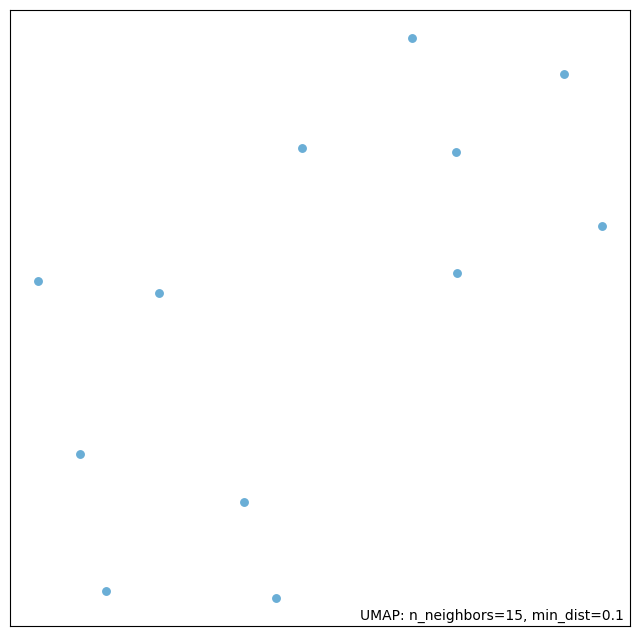

In [ ]:
from umap import UMAP, plot

# substitute None terms in feature matrix with 0
h.features.replace([np.inf, -np.inf], 0, inplace=True)
h_dropped_real = h.features.fillna(0)

matrix = np.nan_to_num(h.features, nan=0.0, posinf=0.0, neginf=0.0) 

map_real = UMAP().fit(h_dropped_real)

%matplotlib inline
plot.points(map_real)

<Axes: >

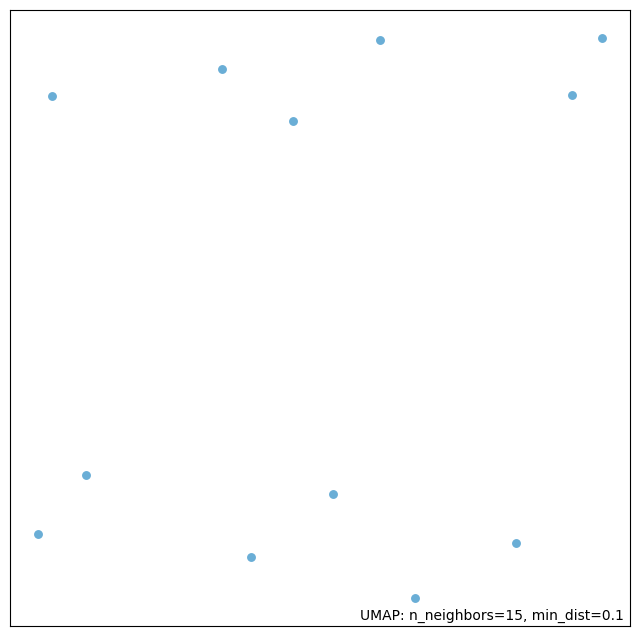

In [ ]:
from umap import UMAP, plot


map_real = UMAP().fit(h_dropped_real)

%matplotlib inline
plot.points(map_real)